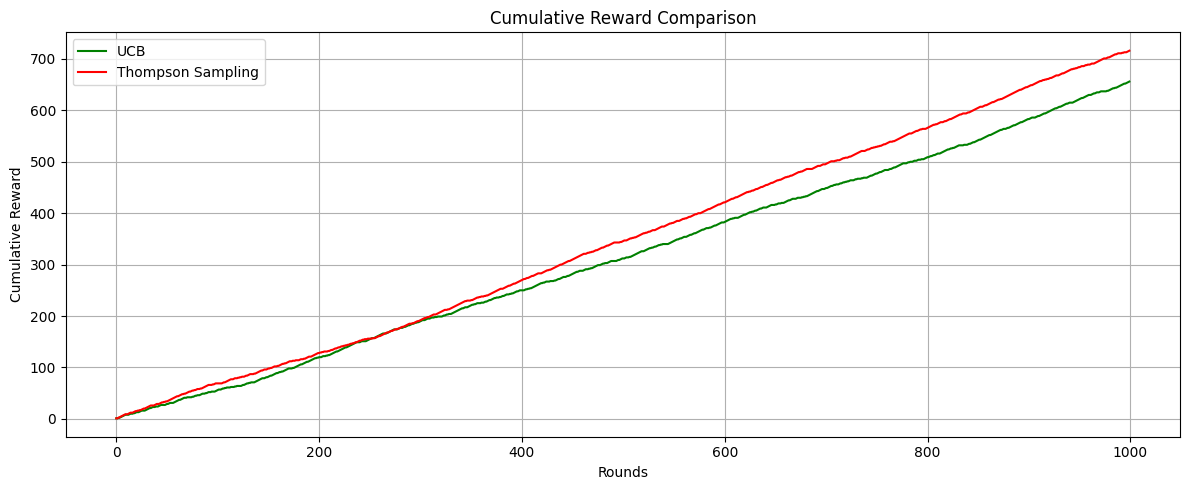

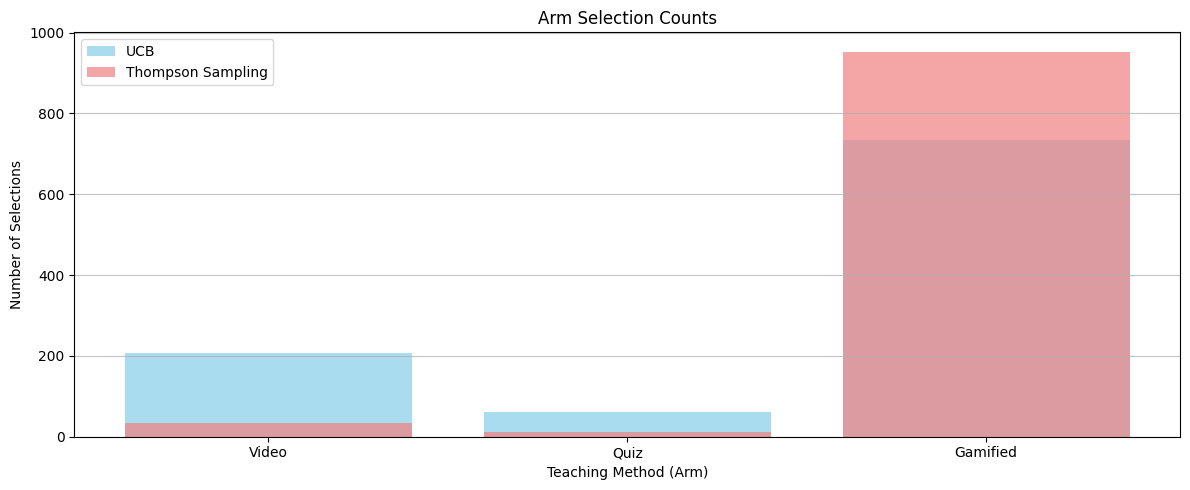

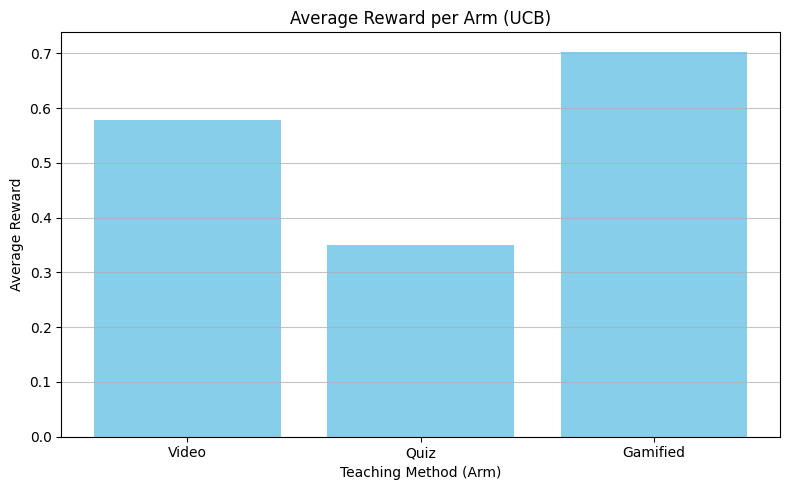

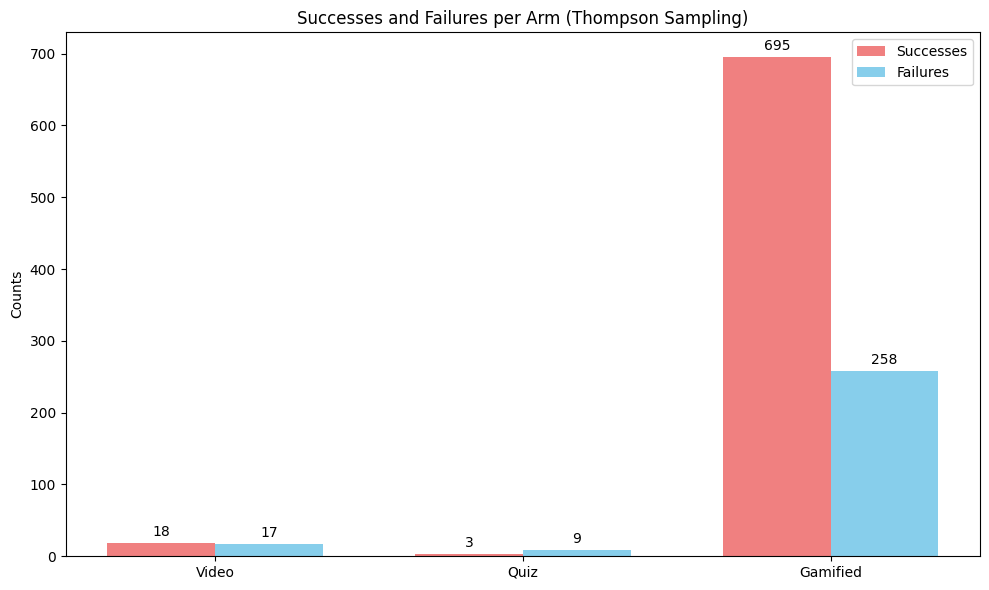

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define success probabilities for the arms (teaching methods)
success_probs = [0.6, 0.4, 0.7]  # Video, Quiz, Gamified
n_arms = len(success_probs)
n_rounds = 1000

# --- UCB ---
def run_ucb():
    counts = np.zeros(n_arms)
    rewards = np.zeros(n_arms)
    cumulative_rewards = []
    selections = []

    for t in range(1, n_rounds + 1):
        ucb_values = [0] * n_arms
        for i in range(n_arms):
            if c = rewards[i] / counts[i]
                delta = np.sqrt(2 * np.log(t) / counts[i])
                ucb_values[i] = avgounts[i] > 0:
                avg_reward_reward + delta
            else:
                ucb_values[i] = float('inf')

        chosen = np.argmax(ucb_values)
        reward = np.random.rand() < success_probs[chosen]

        counts[chosen] += 1
        rewards[chosen] += reward
        selections.append(chosen)
        cumulative_rewards.append(sum(rewards))

    return selections, cumulative_rewards, rewards, counts

# --- Thompson Sampling ---
def run_thompson():
    successes = np.zeros(n_arms)
    failures = np.zeros(n_arms)
    cumulative_rewards = []
    selections = []

    for t in range(n_rounds):
        samples = [np.random.beta(successes[i]+1, failures[i]+1) for i in range(n_arms)]
        chosen = np.argmax(samples)
        reward = np.random.rand() < success_probs[chosen]

        if reward:
            successes[chosen] += 1
        else:
            failures[chosen] += 1

        selections.append(chosen)
        cumulative_rewards.append(np.sum(successes))

    return selections, cumulative_rewards, successes, failures

# Run both
ucb_sel, ucb_rewards, ucb_final_rewards, ucb_final_counts = run_ucb()
ts_sel, ts_rewards, ts_final_successes, ts_final_failures = run_thompson()

# 📈 Plot Cumulative Reward
plt.figure(figsize=(12, 5))
plt.plot(ucb_rewards, label="UCB", color='green')
plt.plot(ts_rewards, label="Thompson Sampling", color='red')
plt.title("Cumulative Reward Comparison")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot Arm Selections
plt.figure(figsize=(12, 5))
plt.hist(ucb_sel, bins=np.arange(-0.5, n_arms + 0.5, 1), alpha=0.7, label='UCB', color='skyblue', rwidth=0.8)
plt.hist(ts_sel, bins=np.arange(-0.5, n_arms + 0.5, 1), alpha=0.7, label='Thompson Sampling', color='lightcoral', rwidth=0.8)
plt.xticks(range(n_arms), ['Video', 'Quiz', 'Gamified'])
plt.title("Arm Selection Counts")
plt.xlabel("Teaching Method (Arm)")
plt.ylabel("Number of Selections")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 🎯 Plot Average Reward per Arm (UCB)
ucb_avg_rewards = [ucb_final_rewards[i] / ucb_final_counts[i] if ucb_final_counts[i] > 0 else 0 for i in range(n_arms)]
plt.figure(figsize=(8, 5))
plt.bar(range(n_arms), ucb_avg_rewards, color='skyblue')
plt.xticks(range(n_arms), ['Video', 'Quiz', 'Gamified'])
plt.title("Average Reward per Arm (UCB)")
plt.xlabel("Teaching Method (Arm)")
plt.ylabel("Average Reward")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 🎯 Plot Success vs Failure per Arm (Thompson Sampling)
arm_labels = ['Video', 'Quiz', 'Gamified']
x = np.arange(n_arms)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ts_final_successes, width, label='Successes', color='lightcoral')
rects2 = ax.bar(x + width/2, ts_final_failures, width, label='Failures', color='skyblue')

ax.set_ylabel('Counts')
ax.set_title('Successes and Failures per Arm (Thompson Sampling)')
ax.set_xticks(x)
ax.set_xticklabels(arm_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()